Let's use Monte Carlo simulation to predict Nifty range- probabilistic values over the next year and then use Facebook open source library fbprophet.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy import stats

We will use last 2 year of Nifty values for our prediction mode. 

In [2]:
nifty=pd.read_csv("../input/nifty-data/NIFTY 500.csv")
nifty.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,01-01-2019,9186.70,9206.05,9128.40,9197.90,7.246622e+08,1.700000e+11,29.70,3.21,1.14
1,02-01-2019,9169.70,9195.25,9065.45,9103.40,1.109343e+09,2.710000e+11,29.39,3.18,1.15
2,03-01-2019,9106.65,9130.00,9006.75,9014.80,9.927080e+08,2.590000e+11,29.11,3.14,1.16
3,04-01-2019,9034.25,9064.85,8978.20,9054.90,1.181699e+09,2.670000e+11,29.24,3.16,1.15
4,07-01-2019,9117.20,9136.30,9064.65,9081.15,9.850718e+08,2.330000e+11,29.32,3.17,1.15


Use this dataset to calculate the mean and volatility of the index levels. 

In [3]:
nifty_returns=(nifty['Close']/nifty['Open'])-1

volatility= np.std(nifty_returns)
trading_days=len(nifty_returns)
mean=(nifty.loc[trading_days-1,'Close']/nifty.loc[0,'Open'])-1

print('Annual Average Nifty return',mean)
print('Annual volatility',volatility*np.sqrt(trading_days))
print('Number of trading days',trading_days)

Annual Average Nifty return 0.1950809322172271
Annual volatility 0.26054612123589466
Number of trading days 479


Let's create a normal distribution with mean of 19.5% and average volatility (or standard deviation) of 26%. The below code will just be a 1 random distribution.

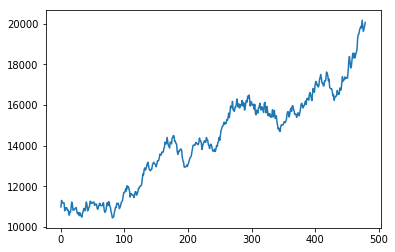

In [4]:
daily_returns=np.random.normal(mean/trading_days,volatility,trading_days)+1

index_returns=[10980]  
                               
for x in daily_returns:
    index_returns.append(index_returns[-1]*x)

plt.plot(index_returns)
plt.show()

Let's run the random distributions for 1000 times.

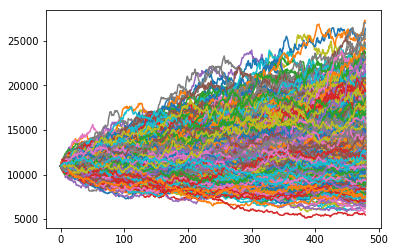

In [5]:
for i in range(1000):
    daily_returns=np.random.normal(mean/trading_days,volatility,trading_days)+1

    index_returns=[10980]  
    
    for x in daily_returns:
        index_returns.append(index_returns[-1]*x)

    plt.plot(index_returns)

plt.show()

With current Nifty levels of 11,278- our random normal distributions give a wide range from downside of 6000 to an upside of 25,000 (ignoring the 29,000 outlier distribution). For derivative traders, this is important that possible downside is very low from crystal ball analysis (or monte carlo simulation).

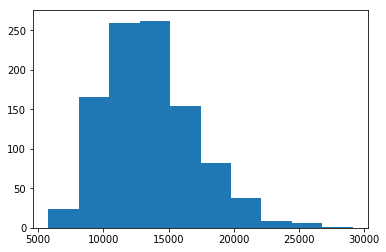

In [6]:
index_result=[]

for i in range(1000):
    daily_returns=np.random.normal(mean/trading_days,volatility,trading_days)+1

    index_returns=[10980]  
    
    for x in daily_returns:
        index_returns.append(index_returns[-1]*x)
 
    index_result.append(index_returns[-1])

plt.hist(index_result)
plt.show()

In [7]:
print('Average expected value of Nifty:',np.mean(index_result))
print('10 percentile:',np.percentile(index_result,10))
print('90 percentile:',np.percentile(index_result,90))

Average expected value of Nifty: 13570.700819529842
10 percentile: 9470.270871282562
90 percentile: 18213.420247232047


From Monte carlo simulation, Nifty is expected to be hovering around **13550 levels **over the next year with range between **9400 to 18000 levels** (from 10 to 90 percentile, ignoring the 10 percentile outliers).

Now let us use Facebook fbprophet library to predict Nifty levels and see how it compares to the standard monte carlo simulation. Use the same Nifty data file as above- index levels for the past 1 year.

In [8]:
from fbprophet import Prophet

In [9]:
nifty.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,01-01-2019,9186.70,9206.05,9128.40,9197.90,7.246622e+08,1.700000e+11,29.70,3.21,1.14
1,02-01-2019,9169.70,9195.25,9065.45,9103.40,1.109343e+09,2.710000e+11,29.39,3.18,1.15
2,03-01-2019,9106.65,9130.00,9006.75,9014.80,9.927080e+08,2.590000e+11,29.11,3.14,1.16
3,04-01-2019,9034.25,9064.85,8978.20,9054.90,1.181699e+09,2.670000e+11,29.24,3.16,1.15
4,07-01-2019,9117.20,9136.30,9064.65,9081.15,9.850718e+08,2.330000e+11,29.32,3.17,1.15


In [10]:
nifty=nifty.iloc[:,0:2]
nifty.head()

,Date,Open
0,01-01-2019,9186.70
1,02-01-2019,9169.70
2,03-01-2019,9106.65
3,04-01-2019,9034.25
4,07-01-2019,9117.20


Since we need only timestamp and prediction value, let's use only date and open column for timeseries prediction.
Prophet API expects date to be in the format of pandas- YYYY-MM-DD. Convert the datetime format in file to the required format. Also, Prophet expects columns to be named as ds and y.

In [11]:
nifty['Date']= pd.to_datetime(nifty['Date'])
nifty.rename(columns={'Date':'ds','Open':'y'},inplace=True)

Create an object of Prophet class and use the fit and predict methods (similar to sklearn API format).

In [12]:
model=Prophet()
model.fit(nifty)

predict_df=model.make_future_dataframe(periods=252)
predict_df.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
726,2021-08-16
727,2021-08-17
728,2021-08-18
729,2021-08-19
730,2021-08-20


In [13]:
forecast=model.predict(predict_df)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
726,2021-08-16,11683.543396,10610.610414,12821.398166,10957.879723,12444.412186,16.645559,16.645559,16.645559,16.645559,16.645559,16.645559,0.0,0.0,0.0,11700.188955
727,2021-08-17,11690.745292,10544.121320,12741.225038,10961.450997,12455.403546,-54.477497,-54.477497,-54.477497,-54.477497,-54.477497,-54.477497,0.0,0.0,0.0,11636.267795
728,2021-08-18,11697.947187,10578.667613,12838.323360,10964.230193,12469.738085,11.736921,11.736921,11.736921,11.736921,11.736921,11.736921,0.0,0.0,0.0,11709.684108
729,2021-08-19,11705.149083,10506.867850,12832.429547,10965.443488,12484.072625,32.065248,32.065248,32.065248,32.065248,32.065248,32.065248,0.0,0.0,0.0,11737.214330
730,2021-08-20,11712.350978,10536.056169,12814.204871,10967.240759,12498.304546,-26.298392,-26.298392,-26.298392,-26.298392,-26.298392,-26.298392,0.0,0.0,0.0,11686.052586


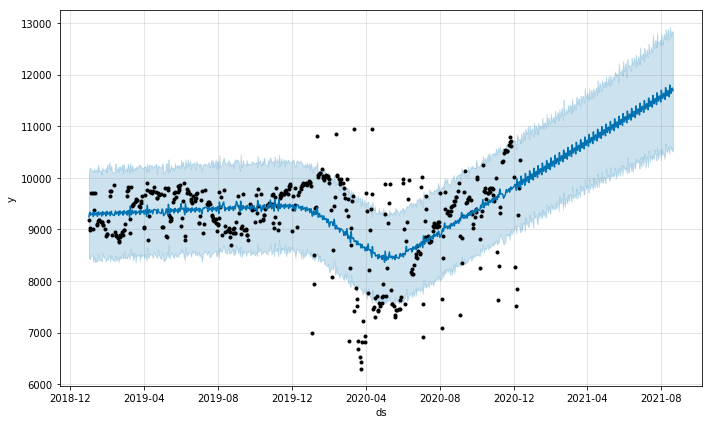

In [14]:
fig1=model.plot(forecast)

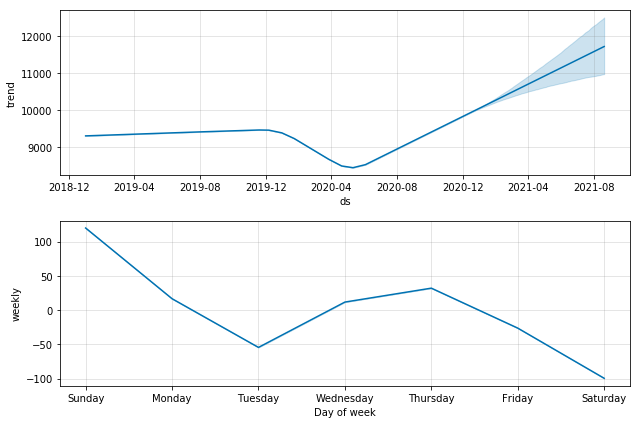

In [15]:
fig2=model.plot_components(forecast)